In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

data = pd.read_csv('dataset.csv')
data['Correct'] = (data['Real'] == data['Answer'])
data['Logentropy'] = np.log(data['Entropy'])
groups = [1, 2, 3, 4, 6, 8, 12, 24]
songs = [('F', 'Old MacDonald'), ('B', 'Brother John'), ('U', 'Generated melody')]
data = data[(data['Participant'] != 'Makiko') & (data['Participant'] != 'Neemegen123') & (data['Participant'] != '0101001')]
print(data['Q10'])

2       3.0
3       4.0
4       3.0
5       4.0
7       5.0
8       2.0
9       3.0
10      3.0
11      5.0
12      2.0
13      4.0
14      3.0
15      1.0
16      4.0
17      3.0
18      2.0
19      5.0
20      NaN
21      4.0
24      3.0
25      4.0
26      3.0
27      4.0
29      5.0
30      2.0
31      3.0
32      3.0
33      5.0
34      2.0
35      4.0
       ... 
1023    5.0
1024    2.0
1025    4.0
1026    3.0
1027    1.0
1028    4.0
1029    3.0
1030    2.0
1031    5.0
1032    NaN
1033    4.0
1036    3.0
1037    4.0
1038    3.0
1039    4.0
1041    5.0
1042    2.0
1043    3.0
1044    3.0
1045    5.0
1046    2.0
1047    4.0
1048    3.0
1049    1.0
1050    4.0
1051    3.0
1052    2.0
1053    5.0
1054    NaN
1055    4.0
Name: Q10, dtype: float64


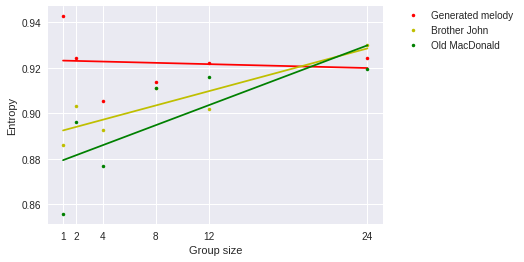

In [107]:
from scipy import stats

x_min, x_max = 1, 24
for song, song_name, color in [('U', 'Generated melody', 'r'), ('B', 'Brother John', 'y'), ('F', 'Old MacDonald', 'g')]:
    x = []
    y = []

    for group_size in [1, 2, 4, 8, 12, 24]:
        items = data[(data['Shuffle'] == group_size) & (data['Answer'] == song)]
        x.append(group_size)
        y.append(items['Entropy'].mean())
        
    plt.plot(x, y, '.' + color, label=song_name)
    x, y = np.array(x), np.array(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    x_test = np.linspace(x_min, x_max, 20)
    plt.plot(x_test, intercept + x_test * slope, '-' + color)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks([1, 2, 4, 8, 12, 24])
plt.xlabel('Group size')
plt.ylabel('Entropy')

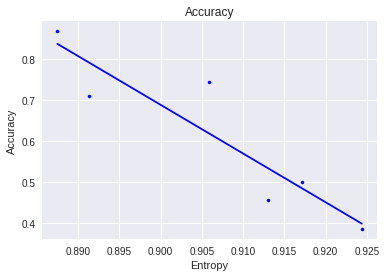

In [109]:
from scipy import stats

x = []
y = []
for group_size in [1, 2, 4, 8, 12, 24]:
    items = data[(data['Shuffle'] == group_size)]
    mean_logentropy = items['Logentropy'].mean()
    accuracy = np.mean(items['Correct'])
    x.append(np.mean(items['Entropy']))
    y.append(accuracy)
x_min, x_max = np.min(x), np.max(x)
plt.plot(x, y, '.b')
x, y = np.array(x), np.array(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_test = np.linspace(x_min, x_max, 20)
plt.plot(x_test, intercept + x_test * slope, '-b')
    
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Entropy')

(0, 1)

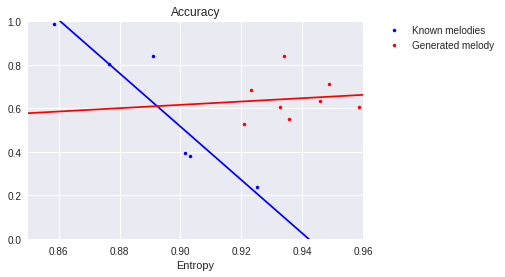

In [102]:
from scipy import stats

x_min, x_max = data['Entropy'].min(), data['Entropy'].max()

x = []
y = []
for group_size in [1, 2, 4, 8, 12, 24]:
    items = data[(data['Shuffle'] == group_size) & (data['Real'] != 'U')]
    mean_logentropy = items['Logentropy'].mean()
    accuracy = np.mean(items['Correct'])
    x.append(np.mean(items['Entropy']))
    y.append(accuracy)
plt.plot(x, y, '.b', label='Known melodies')

x, y = np.array(x), np.array(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_test = np.linspace(x_min, x_max, 20)
plt.plot(x_test, intercept + x_test * slope, '-b')

x = []
y = []
for group_size in [1, 2, 3, 4, 6, 8, 12, 24]:
    items = data[(data['Shuffle'] == group_size) & (data['Real'] == 'U')]
    mean_logentropy = items['Logentropy'].mean()
    accuracy = np.mean(items['Correct'])
    #for ent in items['Entropy'].tolist():
    x.append(items['Entropy'].mean())
    y.append(accuracy)
plt.plot(x, y, '.r', label='Generated melody')

x, y = np.array(x), np.array(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_test = np.linspace(x_min, x_max, 20)
plt.plot(x_test, intercept + x_test * slope, '-r')
    
plt.title('Accuracy')
plt.xlabel('Accuracy')
plt.xlabel('Entropy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0.85, 0.96])
plt.ylim([0, 1])

(0, 1)

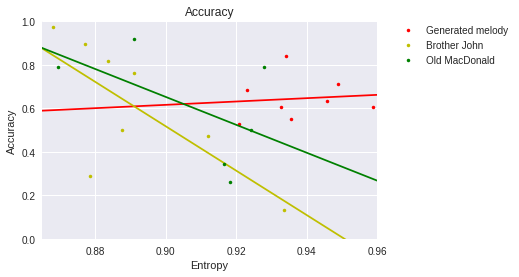

In [122]:
from scipy import stats

x_min, x_max = data['Entropy'].min(), data['Entropy'].max()
for song, song_name, color in [('U', 'Generated melody', 'r'), ('B', 'Brother John', 'y'), ('F', 'Old MacDonald', 'g')]:
    x = []
    y = []
    for group_size in [1, 2, 3, 4, 6, 8, 12, 24]:
        items = data[(data['Shuffle'] == group_size) & (data['Real'] == song)]
        mean_logentropy = items['Logentropy'].mean()
        accuracy = np.mean(items['Correct'])
        x.append(np.mean(items['Entropy']))
        y.append(accuracy)
    plt.plot(x, y, '.' + color, label=song_name)
    x, y = np.array(x), np.array(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    x_test = np.linspace(x_min, x_max, 20)
    plt.plot(x_test, intercept + x_test * slope, '-' + color)
    
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Entropy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0.865, 0.96])
plt.ylim([0, 1])

(0.92, 0.95)

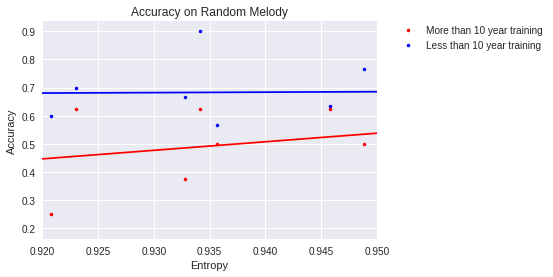

In [123]:
mask = data['Q5'] == '10+'

x = []
y = []
for group_size in [1, 2, 3, 4, 6, 8, 12, 24]:
    items = data[(data['Shuffle'] == group_size) & (data['Real'] == 'U') & (mask)]
    mean_logentropy = items['Logentropy'].mean()
    accuracy = np.mean(items['Correct'])
    #for ent in items['Entropy'].tolist():
    x.append(items['Entropy'].mean())
    y.append(accuracy)
plt.plot(x, y, '.r', label='More than 10 year training')
x, y = np.array(x), np.array(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_test = np.linspace(x_min, x_max, 20)
plt.plot(x_test, intercept + x_test * slope, '-r')

x = []
y = []
for group_size in [1, 2, 3, 4, 6, 8, 12, 24]:
    items = data[(data['Shuffle'] == group_size) & (data['Real'] == 'U') & (1 - mask)]
    mean_logentropy = items['Logentropy'].mean()
    accuracy = np.mean(items['Correct'])
    #for ent in items['Entropy'].tolist():
    x.append(items['Entropy'].mean())
    y.append(accuracy)
plt.plot(x, y, '.b', label='Less than 10 year training')
x, y = np.array(x), np.array(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_test = np.linspace(x_min, x_max, 20)
plt.plot(x_test, intercept + x_test * slope, '-b')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.title('Accuracy on Random Melody')
plt.ylabel('Accuracy')
plt.xlabel('Entropy')
plt.xlim([0.92, 0.95])

[[ 0.57792208  0.07142857  0.35064935]
 [ 0.03246753  0.66233766  0.30519481]
 [ 0.17532468  0.1461039   0.67857143]]


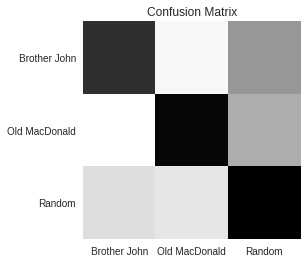

In [4]:
# The larger Q6, the better the noise prediction
sns.set_style("dark")

def counts2matrix(counts):
    rows = []
    for key1 in ['B', 'F', 'U']:
        row = []
        for key2 in ['B', 'F', 'U']:
            if key1 in counts and key2 in counts[key1]:
                row.append(counts[key1][key2])
            else:
                row.append(0)
        rows.append(row)
    return np.matrix(rows)

counts = {}
for row in data[data['Shuffle'] > 1].itertuples():
    real, answer = row.Real.strip(), row.Answer.strip()
    if real not in counts:
        counts[real] = {}
    if answer not in counts[real]:
        counts[real][answer] = 0
    counts[real][answer] += 1
cm = counts2matrix(counts).astype(float)
cm /= np.sum(cm, axis=1).T
print(cm)
lbls = ['Brother John', 'Old MacDonald', 'Random']
fig, ax = plt.subplots(1, 1)
ax.imshow(cm)
ax.set_yticks([0,1,2])
ax.set_xticks([0,1,2])
ax.set_xticklabels(lbls)
ax.set_yticklabels(lbls)
ax.set_title('Confusion Matrix')

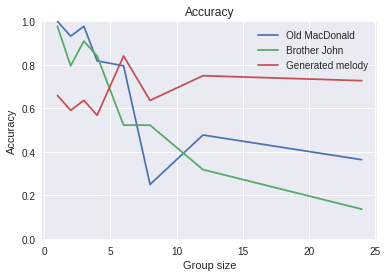

In [3]:
for (shortname, song) in songs:
    y = []
    for group in groups:
        classification = data[(data['Shuffle'] == group) & (data['Real'] == shortname)]
        y.append(np.mean(classification['Correct']))
    plt.plot(groups, y, label=song)
    
plt.legend()
plt.xlabel('Group size')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy')
plt.show()

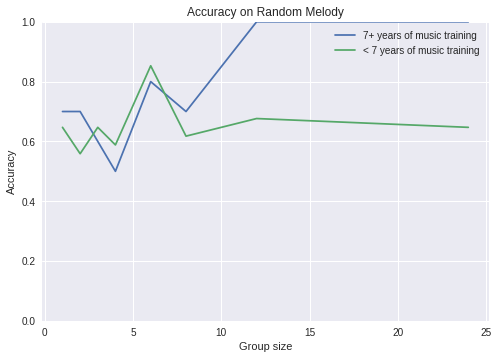

In [136]:
sns.set_style("darkgrid")

y1, y2 = [], []
for group in groups:
    classification = data[(data['Shuffle'] == group) & (data['Real'] == 'U')]
    y1.append(np.mean(classification[(classification['Q4'] == '7+')]['Correct']))
    y2.append(np.mean(classification[(classification['Q4'] != '7+')]['Correct']))
plt.plot(groups, y1, label='7+ years of music training')
plt.plot(groups, y2, label='< 7 years of music training')
    
plt.legend()
plt.xlabel('Group size')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy on Random Melody')
plt.show()

In [103]:
classification = data[(data['Shuffle'] == group) & (data['Real'] != 'U') & (data['Answer'] == 'U')]
print(classification)

     Participant  Block  Song Real  Shuffle Answer   Q1   Q2    Q3   Q4  \
132  Neemegen123      1     7    F       24      U    1    0     0    0   
134         Zina      1     7    F       24      U  4-5  0.5   4-6    0   
135        Linde      1     7    F       24      U  10+    1   4-6  4-6   
136         YXIE      1     7    F       24      U  6-9    2     1  0.5   
137          ANV      1     7    F       24      U    2  0.5     1    0   
140        moose      1     7    F       24      U    1  0.5     2    0   
141     s4636929      1     7    F       24      U  10+  3-4   11+   7+   
144       BANANA      1     7    F       24      U    0    0     3    0   
146    Music IOI      1     7    F       24      U  6-9  1.5     2    2   
148   Luc Wijnen      1     7    F       24      U    2    1     1    2   
149           DD      1     7    F       24      U    0    0     2    0   
150        Jouke      1     7    F       24      U  10+    1     1    3   
151  Denise Klep      1  

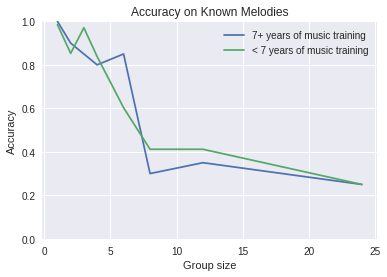

In [111]:
y1, y2 = [], []
for group in groups:
    classification = data[(data['Shuffle'] == group) & (data['Real'] != 'U')]
    y1.append(np.mean(classification[(classification['Q4'] == '7+')]['Correct']))
    y2.append(np.mean(classification[(classification['Q4'] != '7+')]['Correct']))
plt.plot(groups, y1, label='7+ years of music training')
plt.plot(groups, y2, label='< 7 years of music training')
    
plt.legend()
plt.xlabel('Group size')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy on Known Melodies')
plt.show()

[0.87878787878787878, 0.77272727272727271, 0.84090909090909094, 0.74242424242424243, 0.71969696969696972, 0.46969696969696972, 0.51515151515151514, 0.40909090909090912]


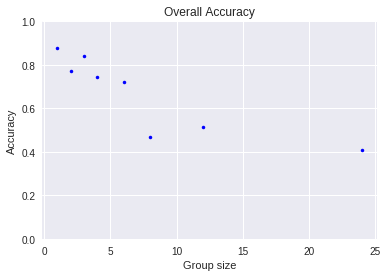

In [113]:
y = []
for group in groups:
    classification = data[(data['Shuffle'] == group)]
    accuracy = np.mean(classification['Answer'] == classification['Real'])
    y.append(accuracy)
print(y)
plt.plot(groups, y, '.b', label=song)
plt.xlabel('Group size')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Overall Accuracy')
plt.show()

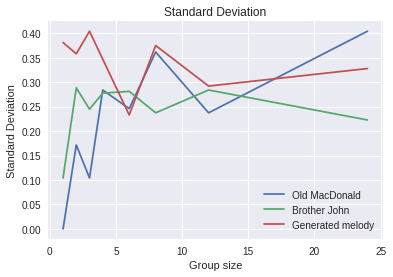

In [73]:
for (shortname, song) in songs:
    y = []
    for group in groups:
        classification = data[(data['Shuffle'] == group) & (data['Real'] == shortname)]
        y.append(np.std(np.mean(classification[participants])))
    plt.plot(groups, y, label=song)
    
plt.legend()
plt.xlabel('Group size')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation')
plt.show()

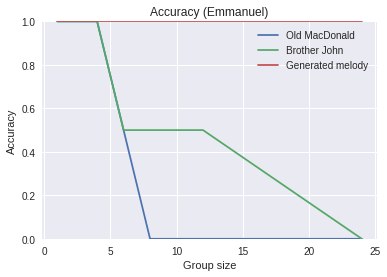

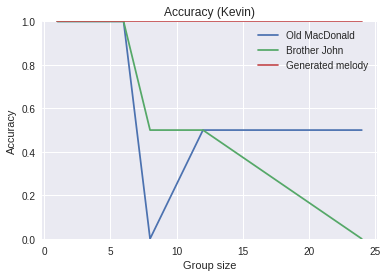

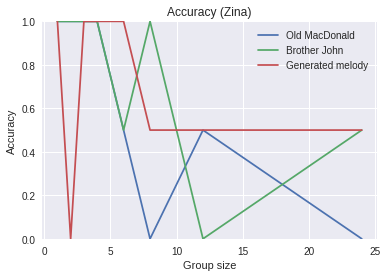

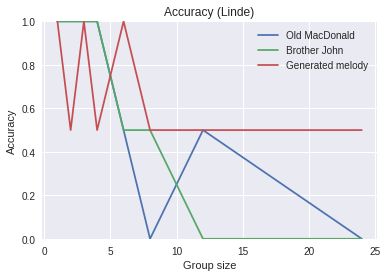

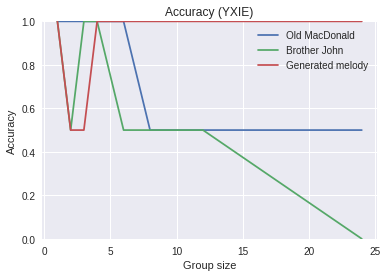

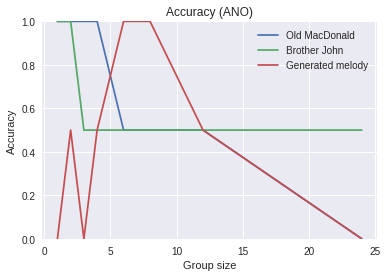

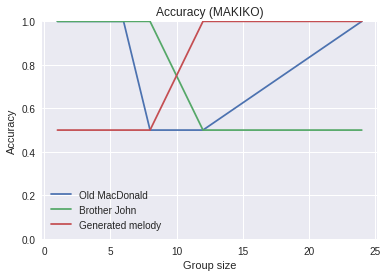

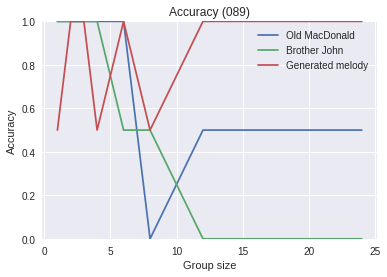

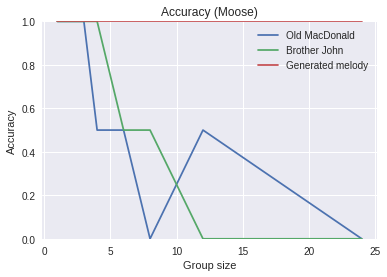

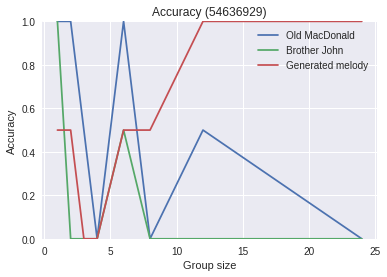

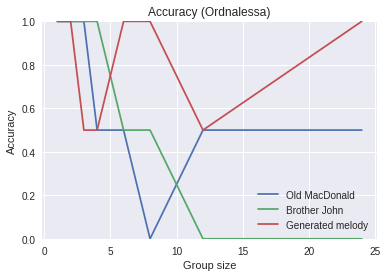

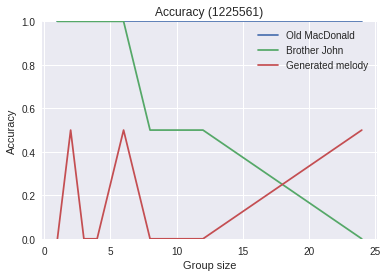

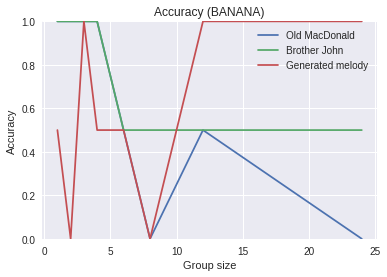

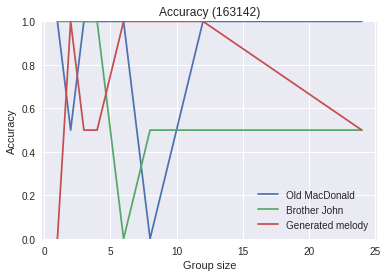

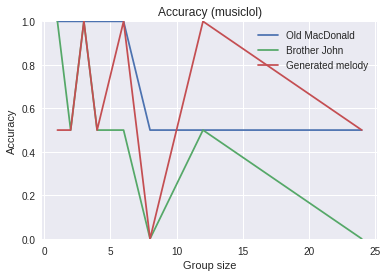

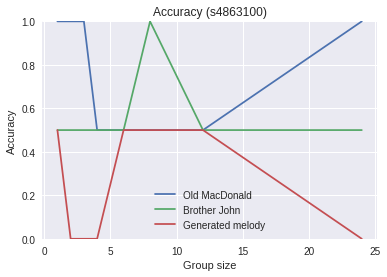

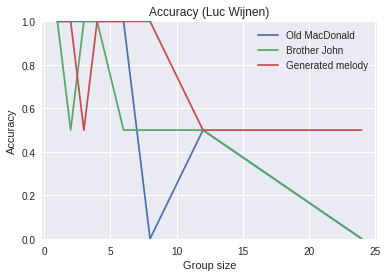

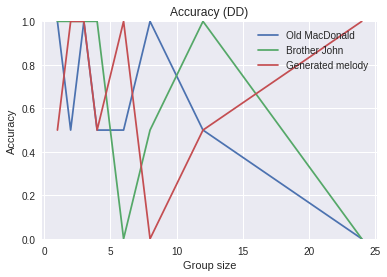

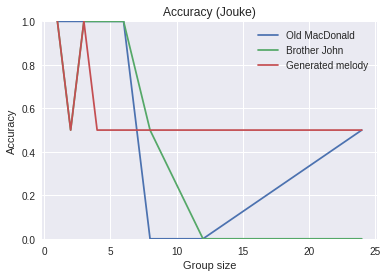

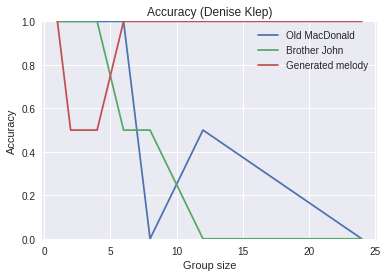

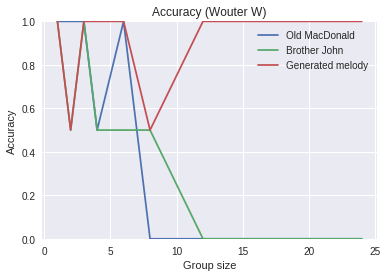

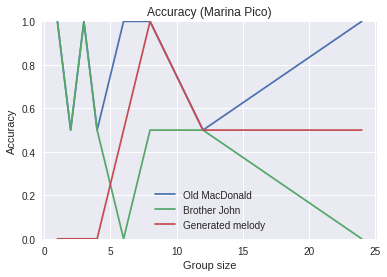

In [78]:
for participant in participants:
    for (shortname, song) in songs:
        y = []
        for group in groups:
            classification = data[(data['Shuffle'] == group) & (data['Real'] == shortname)]
            y.append(np.mean(np.mean(classification[participant])))
        plt.plot(groups, y, label=song)

    plt.legend()
    plt.xlabel('Group size')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title('Accuracy (%s)' % participant)
    plt.show()